# **Exploratory Data Analysis**

Exploratory Data Analysis or usually shorten as EDA is a first step that should be done by every data scientist before they analyze the data or create a model from the data. In EDA we try to understand the data, such as the variables, its data types, null value, performing descriptive statistics, and many more. EDA is important because it helps us to decide what the next things we need to do before performing data analysis or creating a new model. 
Here I will do exploratory data analysis using sample superstore dataset. This is my first time creating exploratory data analysis and I think that it is still need a lot of improvement.

In [ ]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#First, like usual we need to load our data into notebook, here I use google colab for the notebook. 
data = pd.read_csv('/content/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#using .shape function to observe the dimension of he data.
#we can see here that the data consists of 9994 rows and 13 columns

data.shape

(9994, 13)

In [ ]:
#Next we can also observe the data type of each variable 
#We can use function .info to get the data types
#there are 3 variables type float, 2 variables with int type, and 8 variables with type object
#from the result below it also can be seen that there is no variable with null value

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#Using function .describe() we can get results of the descriptive statistics from the data.
# describe() function will only return rseult from numerical variables, as we can see here we get statistic summary result from Postal Code,
# Sales, Quantity, dsicount, and Profit column. As we know the result is not suitable for postal code since postal code 
# is actually not a continues variable. Then further we need to convert the postal code into catagerical variable, we can 
# do it by using .astype function.
data.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#change postal into object, we can use astype function.
#now we can see that postel code is object 
data['Postal Code'] = data['Postal Code'].astype('object')
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code      object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
#we also can observe the statistics descriptive for Postal Code column
data_postal = data[['Postal Code']]
data_postal.describe()

,Postal Code
count,9994
unique,631
top,10035
freq,263


In [ ]:
#actually whe can get the summary statistics from the enitre data frame column by adding include=all
#but as we see below the result is not satisfied 
#so my suggestion is you need to separate the statistics summary between categorical and non categorical variable
data.describe(include='all')

In [ ]:
#here we will only include categorical variables 
#first I will put the categorical varibles into new dataframe called data_categorical
data_categorical = data[['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Postal Code']]
data_categorical.describe()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Postal Code
count,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17,631
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,10035
freq,5968,5191,9994,915,2001,3203,6026,1523,263


In [ ]:
#Now we can count the number of unique value of each variable
#for the Ship Mode there are three different values, Standard Class, Second Class, and Fisrt Class
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [ ]:
#for Segment variables there are also three distinct value, Consumer, Corporate, and Home Office
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [ ]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [ ]:
data['City'].value_counts()

In [ ]:
#we can also use looping to get the all the count values at once
for kolom in data_categorical:
  datas = data[kolom].value_counts()
  print('==============================\n',datas)

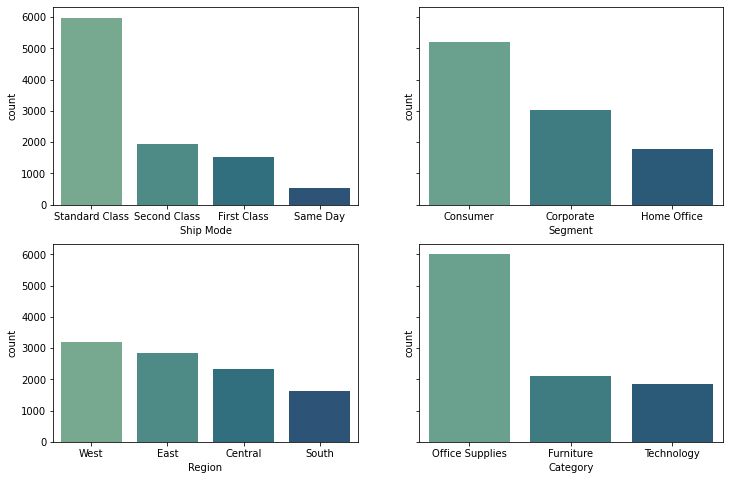

In [ ]:
#We also can create some visualization from each column
fig, axes = plt.subplots(2, 2, figsize= (12,8), sharey = True)

#ship mode
sns.countplot(ax=axes[0][0], x="Ship Mode", data=data_categorical, palette="crest", order = data_categorical['Ship Mode'].value_counts().index)
#axes[0].set_title(bulbasaur.name)

#segment
sns.countplot(ax=axes[0][1], x="Segment", data=data_categorical, palette="crest", order = data_categorical['Segment'].value_counts().index)

#Region
sns.countplot(ax=axes[1][0], x="Region", data=data_categorical, palette="crest", order = data_categorical['Region'].value_counts().index)

#Category
sns.countplot(ax=axes[1][1], x="Category", data=data_categorical, palette="crest", order = data_categorical['Category'].value_counts().index)



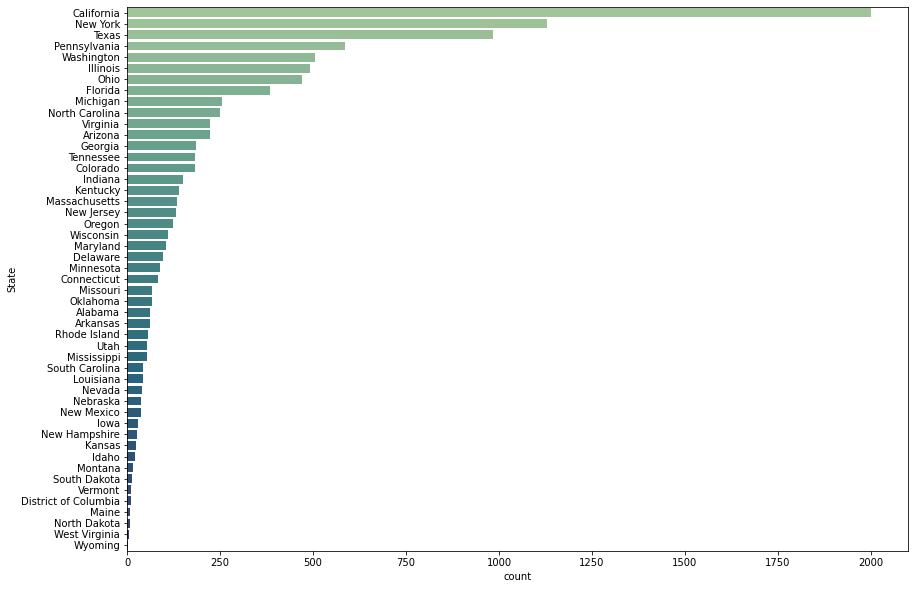

In [ ]:
#State

fig = plt.subplots(figsize= (14,10))
sns.countplot(y="State", data=data_categorical, palette="crest", order = data_categorical['State'].value_counts().index)



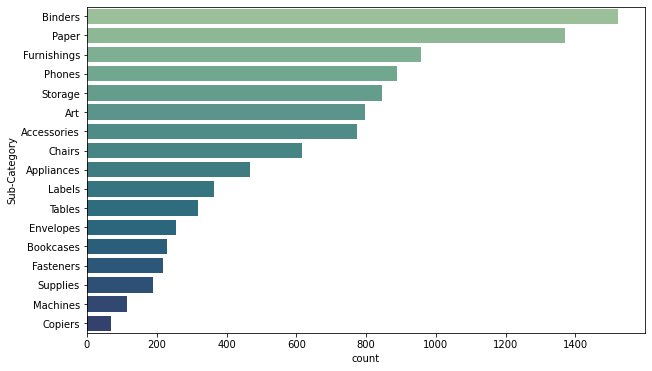

In [ ]:
#Sub-Category
fig = plt.subplots(figsize= (10,6))
sns.countplot(y="Sub-Category", data=data_categorical, palette="crest", order = data_categorical['Sub-Category'].value_counts().index)

In [ ]:
#to visualize non-categorical/numerical variable we can use histogram graph to understand the distribution of the data
#first we can make a new variable to group the numerical data, here i create a new variable named num_variable
num_variable = ['Sales', 'Quantity', 'Discount', 'Profit']

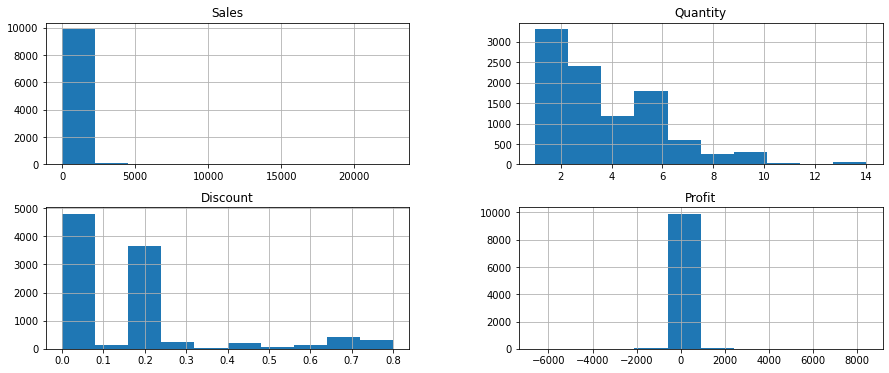

In [ ]:
#we can simultaneously using below code to display the histogram
data[num_variable].hist(bins=10, figsize=(15, 6));


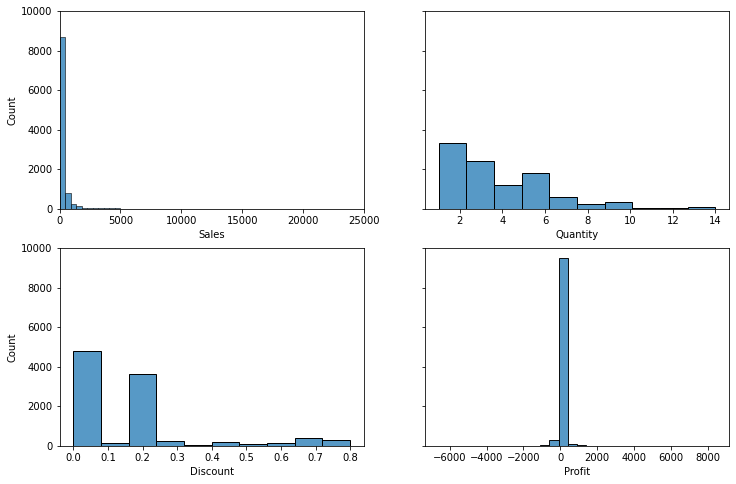

In [ ]:
#Or we also can draw them one by one like below
fig, axes = plt.subplots(2, 2, figsize= (12,8), sharey = True)

sns.histplot(ax=axes[0][0], data=data, x="Sales", bins=50).set(xlim=(0,25000))

sns.histplot(ax=axes[0][1], data=data, x="Quantity", bins=10)

sns.histplot(ax=axes[1][0], data=data, x="Discount", bins = 10)

sns.histplot(ax=axes[1][1], data=data, x="Profit", bins=30)

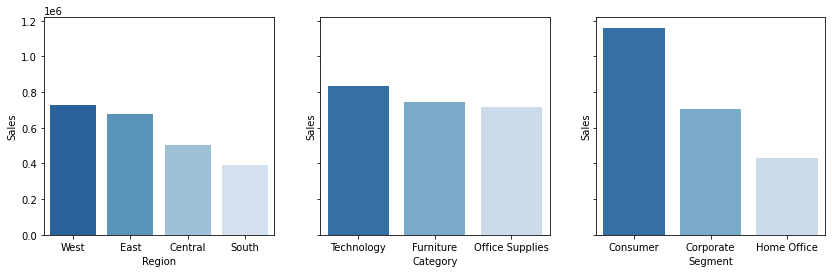

In [ ]:
#Next, observe sales, quantity, discount, profit for each region, category, segment, sub-category state
fig, axes = plt.subplots(1, 3, figsize= (14,4), sharey = True)

#Total sales by region, category, segment, sub-category, and state 
df_numeric = data.groupby(['Region']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Sales'], inplace=True, ascending=False)
sns.barplot(ax = axes[0], x='Region', y='Sales', data=df_numeric, palette='Blues_r')


df_numeric = data.groupby(['Category']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Sales'], inplace=True, ascending=False)
sns.barplot(ax = axes[1], x='Category', y='Sales', data=df_numeric, palette='Blues_r')

df_numeric = data.groupby(['Segment']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Sales'], inplace=True, ascending=False)
sns.barplot(ax = axes[2], x='Segment', y='Sales', data=df_numeric, palette='Blues_r')



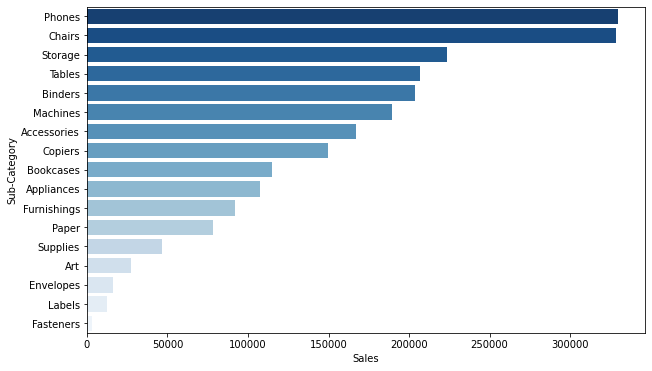

In [ ]:
fig = plt.subplots(figsize= (10,6))

df_numeric = data.groupby(['Sub-Category']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Sales'], inplace=True, ascending=False)
sns.barplot(y='Sub-Category', x='Sales', data=df_numeric, palette='Blues_r')


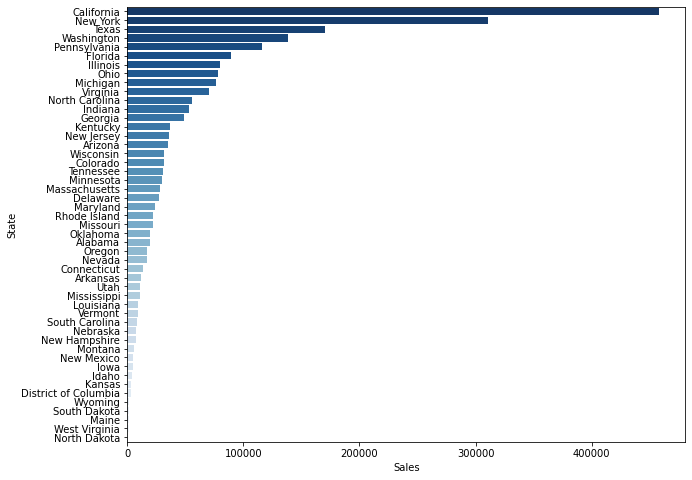

In [ ]:
fig = plt.subplots(figsize= (10,8))

df_numeric = data.groupby(['State']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Sales'], inplace=True, ascending=False)
sns.barplot(y='State', x='Sales', data=df_numeric, palette='Blues_r')

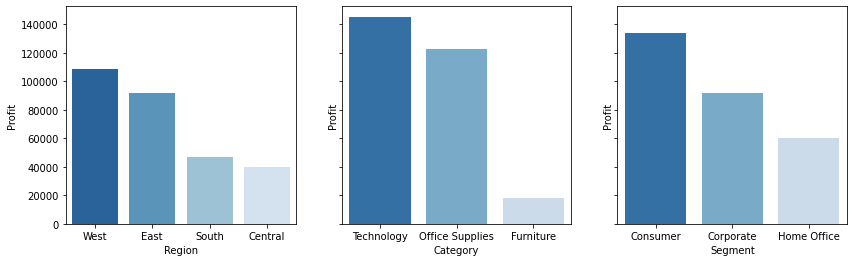

In [ ]:
#Next, observe sales, quantity, discount, profit for each region, category, segment, sub-category state
fig, axes = plt.subplots(1, 3, figsize= (14,4), sharey = True)

#Total sales by region, category, segment, sub-category, and state 
df_numeric = data.groupby(['Region']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Profit'], inplace=True, ascending=False)
sns.barplot(ax = axes[0], x='Region', y='Profit', data=df_numeric, palette='Blues_r')


df_numeric = data.groupby(['Category']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Profit'], inplace=True, ascending=False)
sns.barplot(ax = axes[1], x='Category', y='Profit', data=df_numeric, palette='Blues_r')

df_numeric = data.groupby(['Segment']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Profit'], inplace=True, ascending=False)
sns.barplot(ax = axes[2], x='Segment', y='Profit', data=df_numeric, palette='Blues_r')

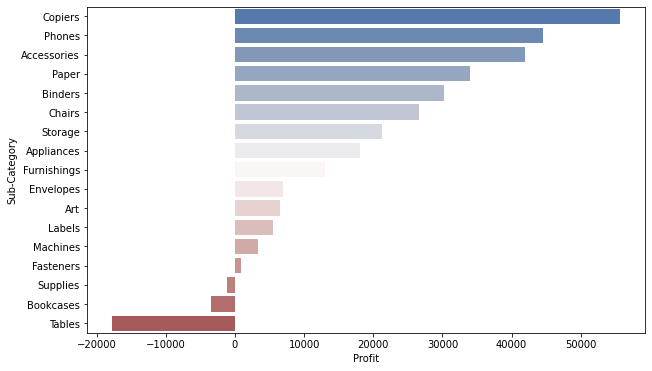

In [ ]:
fig = plt.subplots(figsize= (10,6))

df_numeric = data.groupby(['Sub-Category']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Profit'], inplace=True, ascending=False)
sns.barplot(y='Sub-Category', x='Profit', data=df_numeric, palette='vlag')

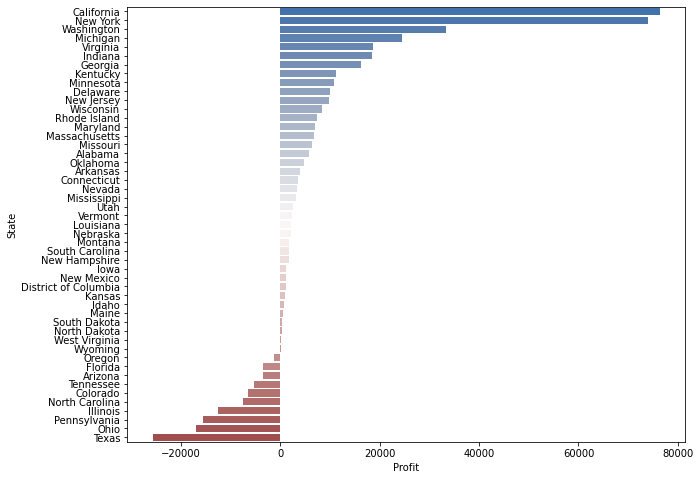

In [ ]:
fig = plt.subplots(figsize= (10,8))

df_numeric = data.groupby(['State']).sum()
df_numeric.reset_index(inplace=True)
df_numeric.sort_values(by=['Profit'], inplace=True, ascending=False)
sns.barplot(y='State', x='Profit', data=df_numeric, palette='vlag')